In [1]:
#Time Series With Pandas
#in this section we will discuss:
#1)DateTime Index Basics
#2)Time Resampling
#3)time shifting
#4)Rolling And Expanding
#5)Time Series Visualization
#6)Time Series Project Exercise


In [1]:
#DateTime Index

In [2]:
from datetime import datetime

In [3]:
my_year=2020
my_month =1
my_day =2
my_hour =13
my_min =30
my_sec =15

In [4]:
my_date =datetime(my_year,my_month,my_day)

In [5]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [6]:
my_date_time =datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [7]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
my_date_time.day

2

In [9]:
type(my_date_time)

datetime.datetime

In [10]:
import numpy as np

In [11]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[h]')

array(['2020-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [12]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [13]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [14]:
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [15]:
#DateTime Index Part Two

In [16]:
import pandas as pd

In [17]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('Jan 01- 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.to_datetime(['2/1/2018','3/1/2018'],format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [20]:
pd.to_datetime(['2/1/2018','3/1/2018'])

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [21]:
pd.to_datetime(['2--1--2018','3--1--2018'],format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [22]:
data=np.random.randn(3,2)
cols=['A','B']
print(data)

[[ 0.47187136  0.23919959]
 [-1.14889075  0.51963796]
 [ 0.29695261  0.04826553]]


In [23]:
idx= pd.date_range('2020-01-01',periods=3,freq='D')

df=pd.DataFrame(data,index=idx,columns=cols)

In [24]:
df.index


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [25]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [26]:
df.index.argmax()

2

In [27]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [28]:
df.index.argmin()

0

In [29]:
# Time Resampling

In [1]:
import pandas as pd

In [8]:
df=pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
2015-01-09,37.2361,27556706
2015-01-12,37.4415,10021486
2015-01-13,37.7401,11040702
2015-01-14,37.5301,9295084


In [9]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [11]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [12]:
#daily--->yearly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [13]:
def first_day(entry):
    
    # is there an entry
    if len(entry) !=0:
        # if so, return first entry
        return entry[0]

In [14]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


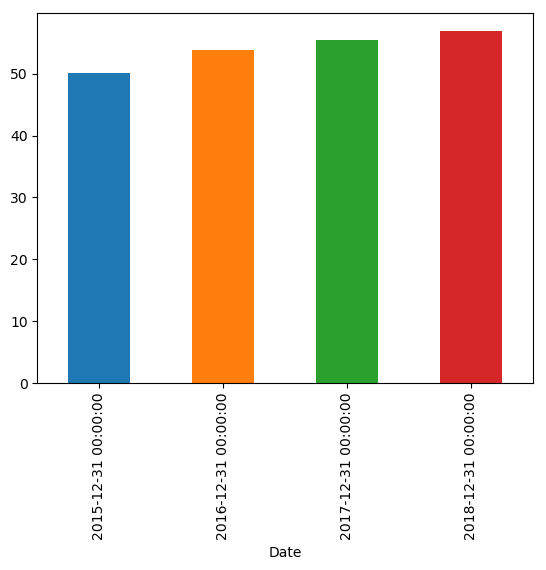

In [18]:
df['Close'].resample('A').mean().plot.bar()

In [19]:
#Time Shifting

In [20]:
import pandas as pd

In [22]:
df=pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)


In [23]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [24]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [35]:
df.shift(1).fillna(0)

,Close,Volume
Date,,
2015-01-02,0.0000,0.0
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
2015-01-09,38.4961,13170548.0
2015-01-12,37.2361,27556706.0
2015-01-13,37.4415,10021486.0
2015-01-14,37.7401,11040702.0


In [31]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [28]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [30]:
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [1]:
#Rolling And Expanding

In [3]:
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
df =pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [7]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


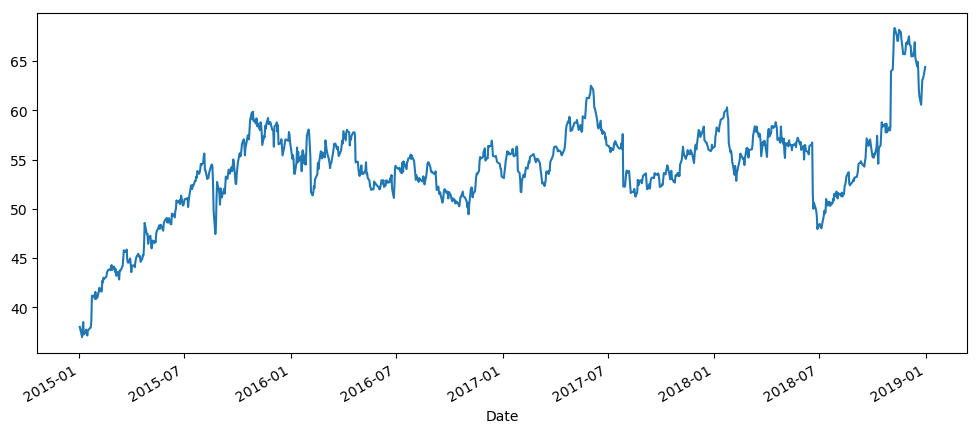

In [9]:
df['Close'].plot(figsize=(12,5))

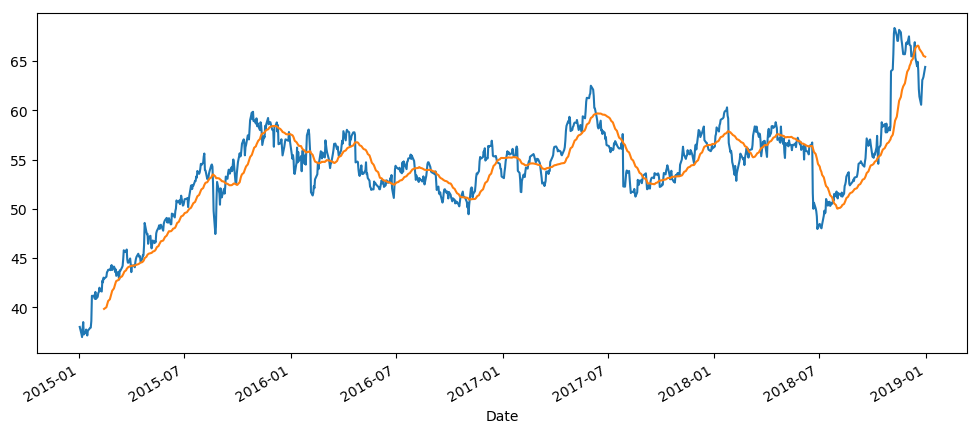

In [12]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

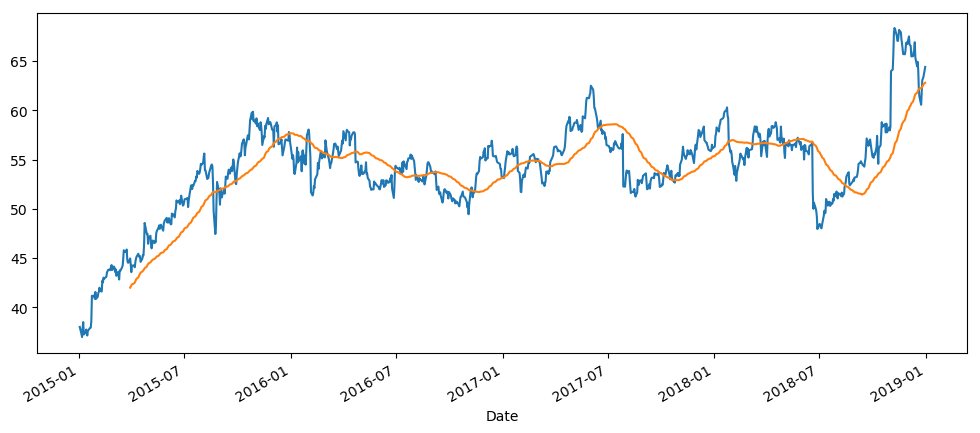

In [13]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

In [14]:
df['Close: 30 Day Mean']= df['Close'].rolling(window=30).mean()

In [15]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


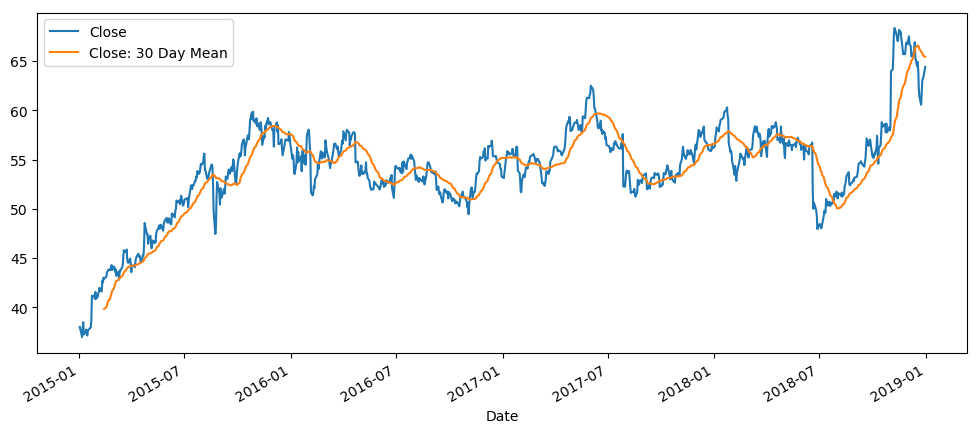

In [16]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

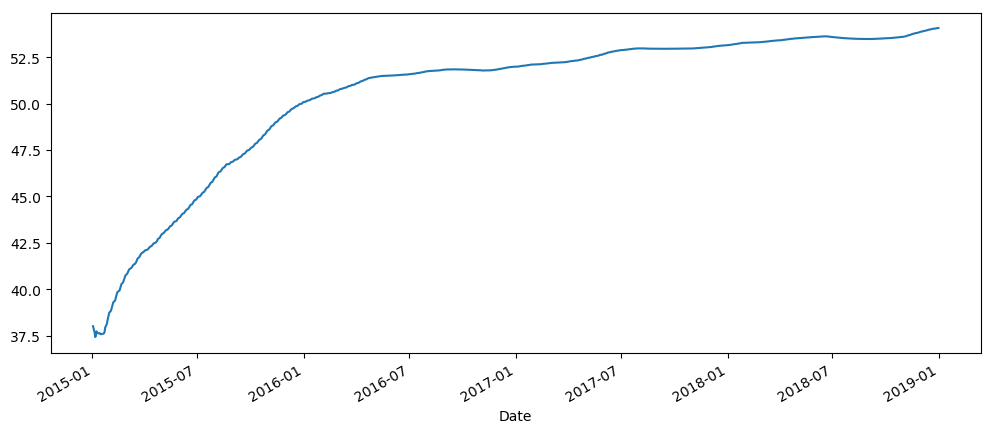

In [17]:
df['Close'].expanding().mean().plot(figsize=(12,5))

In [18]:
#Visualizing Time Series Data with Pandas


In [19]:
import pandas as pd

In [20]:
%matplotlib inline

In [21]:
df =pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [22]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [23]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [24]:
df.index =pd.to_datetime(df.index)

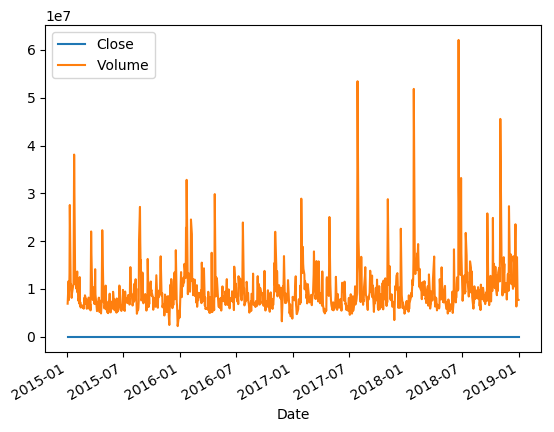

In [25]:
df.plot()

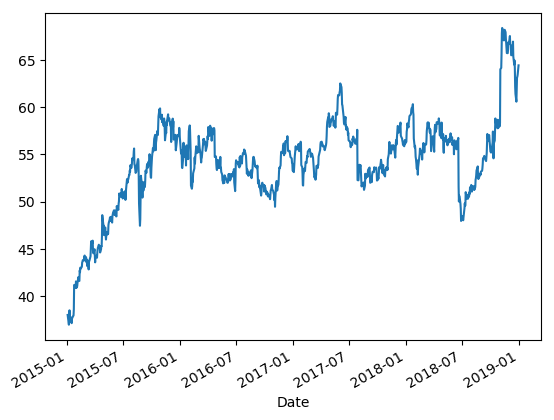

In [27]:
df['Close'].plot();

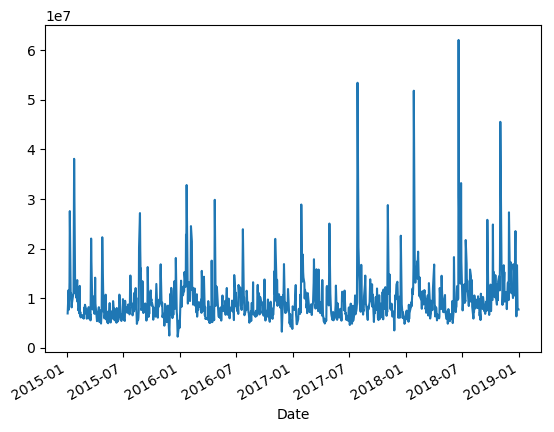

In [28]:
df['Volume'].plot()

In [29]:
title ='TITLE'
ylabel ='Y LABEL'
xlabel ='X LABEL'

[Text(0, 0.5, 'Y LABEL'), Text(0.5, 0, 'X LABEL')]

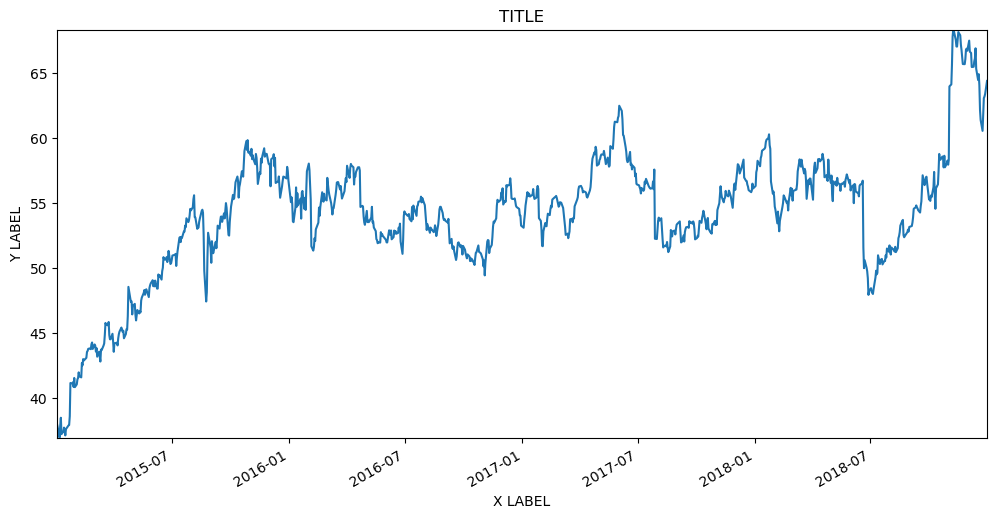

In [36]:
ax=df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

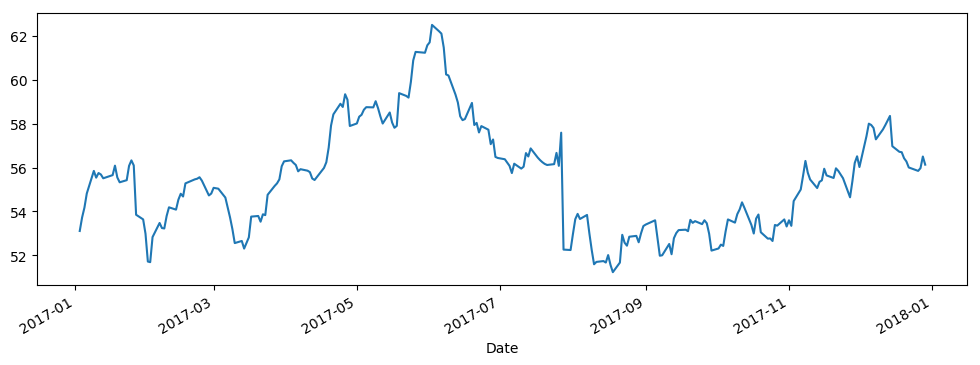

In [39]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))

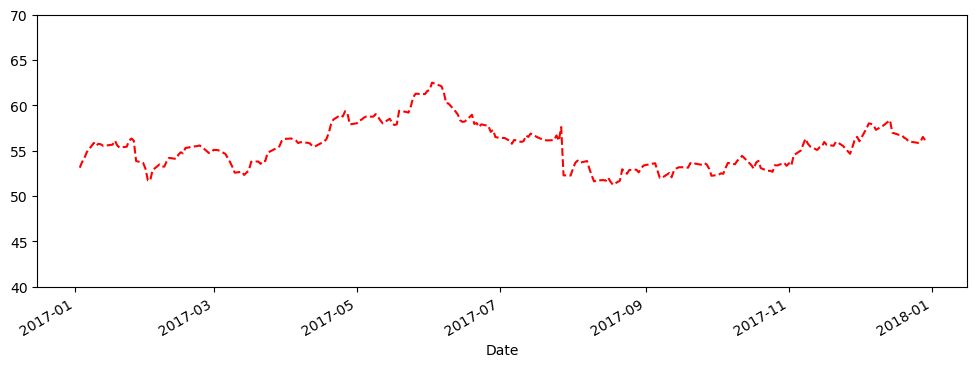

In [45]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ylim=[40,70],ls='--',c='red')

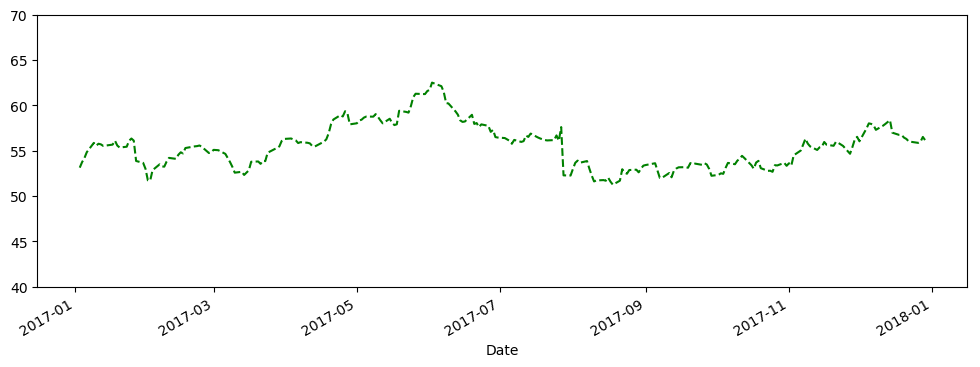

In [46]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ylim=[40,70],ls='--',c='green')

In [47]:
#Visualizing Time Series Data - Part Two

In [49]:
from matplotlib import dates

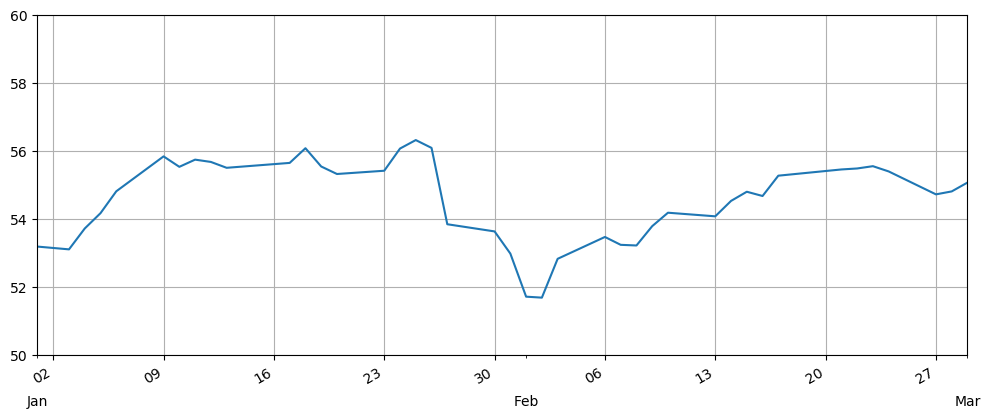

In [68]:
ax=df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')


ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)